<br><br><center><h1 style="font-size:2em;color:#2467C0">Top 10 Population Growth vs GDP Growth Rates</h1></center>


This is an analysis from an open dataset from Kaggle - <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world. Simple analysis of exploring the top 10 countries by population in 1960 and 2014. And then compare the population growth to GDP growth over the same time period

This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

%matplotlib inline

## Step 1: Initial exploration of the Dataset

In [2]:
# initial exploration of the Dataset
data = pd.read_csv('Indicators.csv')
print(data.shape)
data.head(5)

(5656458, 6)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [3]:
# big file with lots of data in terms of a number of rows and information available in the IndicatorName.

# check for null values
data.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

In [4]:
# no nulls!
# what are data types
data.dtypes

CountryName       object
CountryCode       object
IndicatorName     object
IndicatorCode     object
Year               int64
Value            float64
dtype: object

In [5]:
# How many unique country names?
print(len(data['CountryName'].unique().tolist()))

247


In [6]:
# does CountryCode match county names?
print(len(data['CountryCode'].unique().tolist()))

247


In [7]:
# How many unique IndicatorName?
print(len(data['IndicatorName'].unique().tolist()))

1344


In [8]:
# does IndicatorCode match IndicatorName?
print(len(data['IndicatorCode'].unique().tolist()))

1344


In [9]:
# range of years
data_years = data['Year'].unique().tolist()
print(min(data_years)," to ",max(data_years))

1960  to  2015


We have lots of data to work with
- 247 country names
- 1344 inidcators
- and 56 in range of years

In [10]:
# What's in 'CountryName'?
data['CountryName'].unique().tolist()

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)',
 'Euro area',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'High income: nonOECD',
 'High income: OECD',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)',
 'Middle income',
 'North America',
 'OECD members',
 'Other small states',
 'Pacific island small states',
 'Small states',
 'South Asia',
 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)',
 'Upper middle income',
 'Wor

In [11]:
# so, we have countries and non-countries
# make a list of all non-countires

non_countries = ('Arab World', 'Caribbean small states', 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)', 'Euro area',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)', 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)', 'High income',
 'High income: nonOECD', 'High income: OECD',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Least developed countries: UN classification', 'Low & middle income',
 'Low income', 'Lower middle income',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)', 'Middle income',
 'North America', 'OECD members' ,'Other small states',
 'Pacific island small states', 'Small states', 'South Asia',
 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)' ,'Upper middle income' ,'World', 'North America')

In [12]:
# get country only data

country_data = data.query("CountryName not in @non_countries")
print(country_data.shape)

(4926334, 6)


In [13]:
# confirm countries only
print(len(country_data['CountryName'].unique().tolist()))
country_data['CountryName'].unique().tolist()

214


['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faeroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambi

In [14]:
country_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3492,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.453210e+02
3493,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.171773e+01
3494,Afghanistan,AFG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,5.086254e+00
3495,Afghanistan,AFG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,7.663147e+01
3496,Afghanistan,AFG,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,4.000000e+07


In [15]:
# do not need the 'IndicatorCode' column
del(country_data['IndicatorCode'])

In [16]:
country_data.head()

,CountryName,CountryCode,IndicatorName,Year,Value
3492,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",1960,1.453210e+02
3493,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,1960,8.171773e+01
3494,Afghanistan,AFG,"Age dependency ratio, old (% of working-age po...",1960,5.086254e+00
3495,Afghanistan,AFG,"Age dependency ratio, young (% of working-age ...",1960,7.663147e+01
3496,Afghanistan,AFG,Arms imports (SIPRI trend indicator values),1960,4.000000e+07


In [17]:
# a list of the unique IndicatorName field
country_data['IndicatorName'].unique().tolist()

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms imports (SIPRI trend indicator values)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from gaseous fuel consumption (kt)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'CO2 emissions from solid fuel consumption (kt)',
 'Death rate, crude (per 1,000 people)',
 'DEC alternative conversion factor (LCU per US$)',
 'Exports of goods and services (% of GDP)',
 'Exports of goods and services (current LCU)',
 'Exports of goods and services (current US$)',
 'External balance on goods and 

## Step 2: Visualize Top Ten Populations

- Visualize population for the Top Ten Countries in 1960 to 2014

In [18]:
# check population Indicator year ranges
pop_ind = country_data[country_data['IndicatorName'].str.contains('Population, total')]
pop_ind.head()

,CountryName,CountryCode,IndicatorName,Year,Value
3593,Afghanistan,AFG,"Population, total",1960,8994793.0
3641,Albania,ALB,"Population, total",1960,1608800.0
3813,Algeria,DZA,"Population, total",1960,11124892.0
3832,American Samoa,ASM,"Population, total",1960,20012.0
3844,Andorra,ADO,"Population, total",1960,13414.0


In [19]:
print(pop_ind['Year'].min())
print(pop_ind['Year'].max())

1960
2014


In [20]:
# 1960 population data and sort to get the top ten

mask_year_1960 = country_data['Year'].isin([1960])
mask_pop = country_data['IndicatorName'].str.contains('Population, total')

top_ten_pop_1960 = country_data[mask_year_1960 & mask_pop].sort_values("Value",ascending=False)[0:10]
top_ten_pop_1960

,CountryName,CountryCode,IndicatorName,Year,Value
7249,China,CHN,"Population, total",1960,667070000.0
11758,India,IND,"Population, total",1960,449661874.0
22374,United States,USA,"Population, total",1960,180671000.0
18305,Russian Federation,RUS,"Population, total",1960,119897000.0
12951,Japan,JPN,"Population, total",1960,92500572.0
11929,Indonesia,IDN,"Population, total",1960,87792512.0
10074,Germany,DEU,"Population, total",1960,72814900.0
5800,Brazil,BRA,"Population, total",1960,72493585.0
22203,United Kingdom,GBR,"Population, total",1960,52400000.0
12666,Italy,ITA,"Population, total",1960,50199700.0


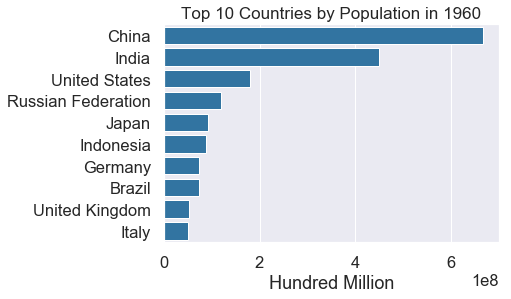

In [21]:
# Visualize 1960 Populations
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.barplot(x = 'Value', y = 'CountryName', color='tab:blue', data = top_ten_pop_1960)
plt.xlabel('Hundred Million')
plt.ylabel('')
plt.title('Top 10 Countries by Population in 1960', fontsize=17)
fig.savefig("./top_ten_images/bar_1960_pop.png", dpi=250, bbox_inches = "tight")

In 1960, China lead the world with 600 million people followed by India and the USA at 180 million. Italy comes in at # 10  with 50 million.

In [22]:
# 2014 population data and sort to get the top ten
mask_year_2014 = country_data['Year'].isin([2014])
mask_pop = country_data['IndicatorName'].str.contains('Population, total')

top_ten_pop_2014 = country_data[mask_year_2014 & mask_pop].sort_values("Value",ascending=False)[0:10]
top_ten_pop_2014

,CountryName,CountryCode,IndicatorName,Year,Value
5564648,China,CHN,"Population, total",2014,1.364270e+09
5585606,India,IND,"Population, total",2014,1.295292e+09
5637468,United States,USA,"Population, total",2014,3.188571e+08
5586245,Indonesia,IDN,"Population, total",2014,2.544548e+08
5558180,Brazil,BRA,"Population, total",2014,2.060779e+08
5612237,Pakistan,PAK,"Population, total",2014,1.850443e+08
5610780,Nigeria,NGA,"Population, total",2014,1.774760e+08
5552617,Bangladesh,BGD,"Population, total",2014,1.590775e+08
5617961,Russian Federation,RUS,"Population, total",2014,1.438196e+08
5589436,Japan,JPN,"Population, total",2014,1.271318e+08


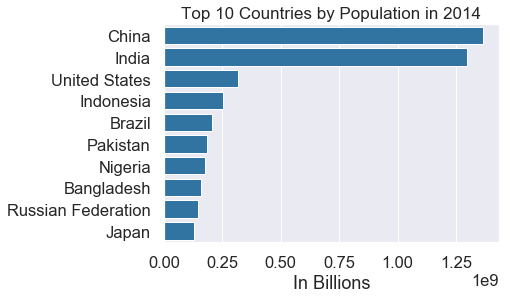

In [23]:
# Visualize 2014 Populations
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.barplot(x = 'Value', y = 'CountryName', color='tab:blue', data = top_ten_pop_2014)
plt.xlabel('In Billions')
plt.ylabel('')
plt.title('Top 10 Countries by Population in 2014', fontsize=17)
fig.savefig("./top_ten_images/bar_2014_pop.png", dpi=250, bbox_inches = "tight")

In 2014 the top three countries remained the same - China leading with over 1.3 billion followed by India and the USA at 318 million. Germany, UK and Italy were in 1960 but not 2014. Pakistan, Nigeria and Bangladesh in 2014 but not 1960.

In [24]:
# Finding common countries in both 1960 and 2014
for key,group in top_ten_pop_1960.groupby(['CountryName']):
    for key2, group2 in top_ten_pop_2014.groupby(['CountryName']):
        if key == key2:
            print (key)

Brazil
China
India
Indonesia
Japan
Russian Federation
United States


- In 1960 but not 2014 (Germany, United Kingdom, Italy)
- In 2014 but not 1960 (Pakistan, Nigeria, Bangladesh)

Let's explore the growth rates of countries in both 1960 and 2014

In [25]:
# Adding Germany, United Kingdom and Italy to the top_ten_pop_2014 DF

mask_2014_DEU_GBR_ITA = country_data['CountryCode'].str.contains('DEU|GBR|ITA')
DEU_GBR_ITA_2014 = country_data[mask_2014_DEU_GBR_ITA & mask_year_2014 & mask_pop]

r_2014_pop = pd.concat([top_ten_pop_2014, DEU_GBR_ITA_2014], axis=0)

In [26]:
# Adding Pakistan, Nigeria and Bangladesh to the top_ten_pop_1960 DF

mask_1960_PAK_NGA_BGD = country_data['CountryCode'].str.contains('PAK|NGA|BGD')
PAK_NGA_BGD_1960 = country_data[mask_1960_PAK_NGA_BGD & mask_year_1960 & mask_pop]

r_1960_pop = pd.concat([top_ten_pop_1960, PAK_NGA_BGD_1960], axis=0)

In [27]:
# merge dataframes, add percent growth
pop_growth_df = pd.merge(r_2014_pop, r_1960_pop,on='CountryName', how='left')
pop_growth_df['Pct_Pop_Growth'] = (pop_growth_df['Value_x'] - pop_growth_df['Value_y']) / pop_growth_df['Value_y'] * 100
pop_growth_df.sort_values('Pct_Pop_Growth', ascending=False)

,CountryName,CountryCode_x,IndicatorName_x,Year_x,Value_x,CountryCode_y,IndicatorName_y,Year_y,Value_y,Pct_Pop_Growth
5,Pakistan,PAK,"Population, total",2014,1.850443e+08,PAK,"Population, total",1960,44911810.0,312.016986
6,Nigeria,NGA,"Population, total",2014,1.774760e+08,NGA,"Population, total",1960,45211614.0,292.545123
7,Bangladesh,BGD,"Population, total",2014,1.590775e+08,BGD,"Population, total",1960,48200702.0,230.031527
3,Indonesia,IDN,"Population, total",2014,2.544548e+08,IDN,"Population, total",1960,87792512.0,189.836539
1,India,IND,"Population, total",2014,1.295292e+09,IND,"Population, total",1960,449661874.0,188.059010
4,Brazil,BRA,"Population, total",2014,2.060779e+08,BRA,"Population, total",1960,72493585.0,184.270530
0,China,CHN,"Population, total",2014,1.364270e+09,CHN,"Population, total",1960,667070000.0,104.516767
2,United States,USA,"Population, total",2014,3.188571e+08,USA,"Population, total",1960,180671000.0,76.484912
9,Japan,JPN,"Population, total",2014,1.271318e+08,JPN,"Population, total",1960,92500572.0,37.438934
12,United Kingdom,GBR,"Population, total",2014,6.451038e+07,GBR,"Population, total",1960,52400000.0,23.111405


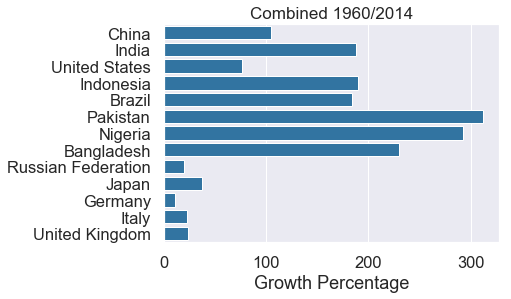

In [28]:
fig = plt.figure()
sns.barplot (x = 'Pct_Pop_Growth', y = 'CountryName', color='tab:blue', data = pop_growth_df)
plt.xlabel('Growth Percentage')
plt.ylabel('')
plt.title('Combined 1960/2014', fontsize=17)
fig.savefig("./top_ten_images/bar_combined_1960_2014_pop.png", dpi=250, bbox_inches = "tight")

Growth percentages show why Germany, UK and Italy fell out of the top ten and why Pakistan, Nigeria and Bangladesh entered the top 10 in 2014. 

### Line Charts to show population trends

In [29]:
# masks for years and population
years = list(range(1960,2015))
mask_years = country_data['Year'].isin(years)
mask_pop = country_data['IndicatorName'].str.contains('Population, total')
mask_top_ten = country_data['CountryCode'].str.contains('CHN|IND|USA|IDN|BRA|PAK|NGA|BGD|RUS|JPN')

In [30]:
top_ten_pop = country_data[mask_years & mask_pop & mask_top_ten]

In [31]:
CHN_pop = top_ten_pop[top_ten_pop['CountryName'].str.contains('China')]
IND_pop = top_ten_pop[top_ten_pop['CountryName'].str.contains('India')]
USA_pop = top_ten_pop[top_ten_pop['CountryName'].str.contains('United States')]
IDN_pop = top_ten_pop[top_ten_pop['CountryName'].str.contains('Indonesia')]
BRA_pop = top_ten_pop[top_ten_pop['CountryName'].str.contains('Brazil')]
PAK_pop = top_ten_pop[top_ten_pop['CountryName'].str.contains('Pakistan')]
NGA_pop = top_ten_pop[top_ten_pop['CountryName'].str.contains('Nigeria')]
BGD_pop = top_ten_pop[top_ten_pop['CountryName'].str.contains('Bangladesh')]
RUS_pop = top_ten_pop[top_ten_pop['CountryName'].str.contains('Russian Federation')]
JPN_pop = top_ten_pop[top_ten_pop['CountryName'].str.contains('Japan')]

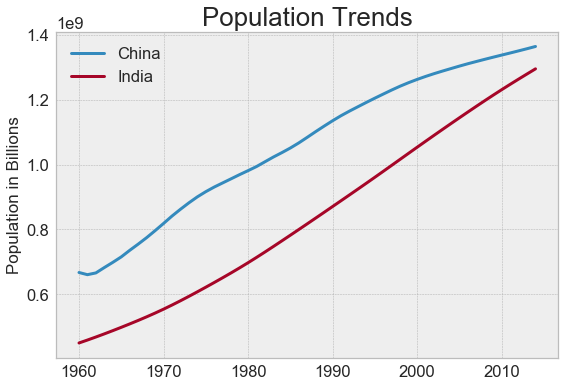

In [32]:
fig = plt.figure(figsize=(9,6))
plt.style.use('bmh')

plt.plot(CHN_pop['Year'], CHN_pop['Value'], label='China', linewidth=3)
plt.plot(IND_pop['Year'], IND_pop['Value'], label='India', linewidth=3)

plt.ylabel('Population in Billions', fontsize=17)
plt.title('Population Trends')
plt.legend(loc='best')
plt.grid(True)

plt.show
fig.savefig("./top_ten_images/line_CHN_IND_pop.png", dpi=250, bbox_inches = "tight")

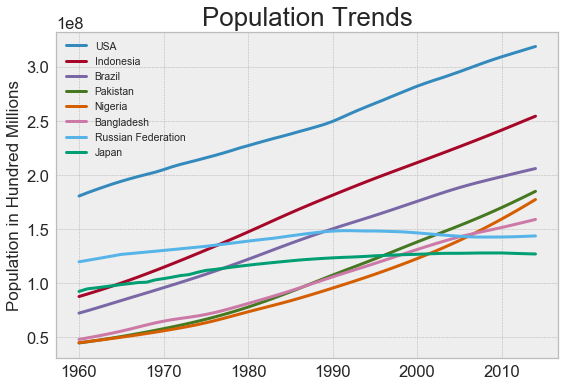

In [33]:
## remove China India
fig = plt.figure(figsize=(9,6))
plt.style.use('bmh')

plt.plot(USA_pop['Year'], USA_pop['Value'], label='USA', linewidth=3)
plt.plot(IDN_pop['Year'], IDN_pop['Value'], label='Indonesia', linewidth=3)
plt.plot(BRA_pop['Year'], BRA_pop['Value'], label='Brazil', linewidth=3)
plt.plot(PAK_pop['Year'], PAK_pop['Value'], label='Pakistan', linewidth=3)
plt.plot(NGA_pop['Year'], NGA_pop['Value'], label='Nigeria', linewidth=3)
plt.plot(BGD_pop['Year'], BGD_pop['Value'], label='Bangladesh', linewidth=3)
plt.plot(RUS_pop['Year'], RUS_pop['Value'], label='Russian Federation', linewidth=3)
plt.plot(JPN_pop['Year'], JPN_pop['Value'], label='Japan', linewidth=3)

plt.ylabel('Population in Hundred Millions', fontsize=17)
plt.title('Population Trends')
plt.legend(loc='best', fontsize='xx-small')
plt.grid(True)

plt.show
fig.savefig("./top_ten_images/line_exc_CHN_IND_pop.png", dpi=250, bbox_inches = "tight")

- Simple line chart showing growth trends. Excluded China & India as they skew the line chart.
- Notice the flatness of Russia and Japan. In 1960 and 2014 they went from 4 to 9 and 5 to 10 respectively. 

## Step 3: Visualize GDP Over Time

In [34]:
# looking at GDP over time for the top ten in 2014
mask_gdp = country_data['IndicatorName'].str.contains('GDP per capita \(constant 2005')
top_ten_gdp = country_data[mask_years & mask_gdp & mask_top_ten]

In [35]:
CHN_gdp = top_ten_gdp[top_ten_gdp['CountryName'].str.contains('China')]
IND_gdp = top_ten_gdp[top_ten_gdp['CountryName'].str.contains('India')]
USA_gdp = top_ten_gdp[top_ten_gdp['CountryName'].str.contains('United States')]
IDN_gdp = top_ten_gdp[top_ten_gdp['CountryName'].str.contains('Indonesia')]
BRA_gdp = top_ten_gdp[top_ten_gdp['CountryName'].str.contains('Brazil')]
PAK_gdp = top_ten_gdp[top_ten_gdp['CountryName'].str.contains('Pakistan')]
NGA_gdp = top_ten_gdp[top_ten_gdp['CountryName'].str.contains('Nigeria')]
BGD_gdp = top_ten_gdp[top_ten_gdp['CountryName'].str.contains('Bangladesh')]
RUS_gdp = top_ten_gdp[top_ten_gdp['CountryName'].str.contains('Russian Federation')]
JPN_gdp = top_ten_gdp[top_ten_gdp['CountryName'].str.contains('Japan')]

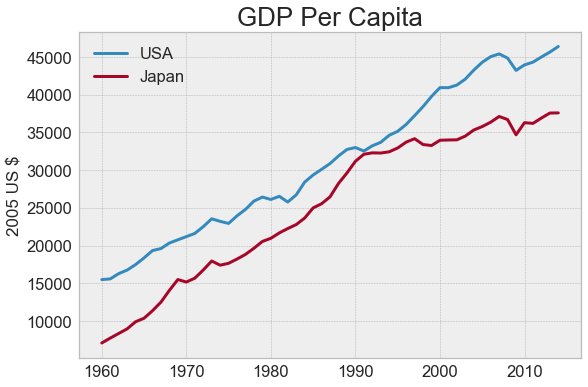

In [36]:
fig = plt.figure(figsize=(9,6))
plt.style.use('bmh')

plt.plot(USA_gdp['Year'], USA_gdp['Value'], label='USA', linewidth=3)
plt.plot(JPN_gdp['Year'], JPN_gdp['Value'], label='Japan', linewidth=3)

plt.ylabel('2005 US $', fontsize=17)
plt.title('GDP Per Capita')
plt.legend(loc='best')
plt.grid(True)

plt.show
fig.savefig("./top_ten_images/gdp_usa_jpn.png", dpi=250, bbox_inches = "tight")

Because GDP per capita is far greater in the US and Japan they are separated from the other top 10 countries. Essentially they start at $7,000 in 1960 which is where the Russia ends in 2014.

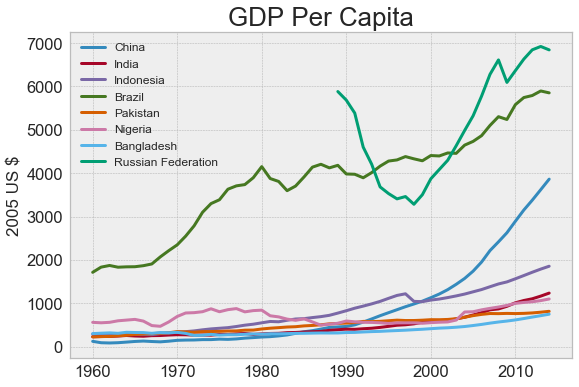

In [37]:
fig = plt.figure(figsize=(9,6))
plt.style.use('bmh')

plt.plot(CHN_gdp['Year'], CHN_gdp['Value'], label='China', linewidth=3)
plt.plot(IND_gdp['Year'], IND_gdp['Value'], label='India', linewidth=3)
plt.plot(IDN_gdp['Year'], IDN_gdp['Value'], label='Indonesia', linewidth=3)
plt.plot(BRA_gdp['Year'], BRA_gdp['Value'], label='Brazil', linewidth=3)
plt.plot(PAK_gdp['Year'], PAK_gdp['Value'], label='Pakistan', linewidth=3)
plt.plot(NGA_gdp['Year'], NGA_gdp['Value'], label='Nigeria', linewidth=3)
plt.plot(BGD_gdp['Year'], BGD_gdp['Value'], label='Bangladesh', linewidth=3)
plt.plot(RUS_gdp['Year'], RUS_gdp['Value'], label='Russian Federation', linewidth=3)

plt.ylabel('2005 US $', fontsize=17)
plt.title('GDP Per Capita')
plt.legend(loc='best', prop={'size': 12})
plt.grid(True)

plt.show
fig.savefig("./top_ten_images/gdp_ciibpnr.png", dpi=250, bbox_inches = "tight")

A couple of points to highlight. 
- The dissolution of the USSR (Russia) in 1991 shows a real GDP decline in the 90s which recovered in 2000s. 
- In the sixties China's GDP Per Capita was roughly $100 (fluctuated between $83 and $127). In 2014 is was ~$3,800 a big % gain. 
- India went from $228 in 1960 to $1,233 in 2014. 

In [38]:
# remove Russia from growth Rates as GDP data only goes back to 1990
mask_country = country_data['CountryCode'].str.contains('CHN|IND|USA|IDN|BRA|PAK|NGA|BGD|JPN')
gdp_1960 = country_data[mask_year_1960 & mask_gdp & mask_country]
gdp_2014 = country_data[mask_year_2014 & mask_gdp & mask_country]

In [39]:
gdp_growth_df = pd.merge(gdp_2014,gdp_1960 ,on='CountryName', how='left')
gdp_growth_df['Pct_GDP_Growth'] = (gdp_growth_df['Value_x'] - gdp_growth_df['Value_y']) / gdp_growth_df['Value_y'] * 100
gdp_growth_df

,CountryName,CountryCode_x,IndicatorName_x,Year_x,Value_x,CountryCode_y,IndicatorName_y,Year_y,Value_y,Pct_GDP_Growth
0,Bangladesh,BGD,GDP per capita (constant 2005 US$),2014,747.370841,BGD,GDP per capita (constant 2005 US$),1960,299.726686,149.350784
1,Brazil,BRA,GDP per capita (constant 2005 US$),2014,5852.499760,BRA,GDP per capita (constant 2005 US$),1960,1712.763497,241.699235
2,China,CHN,GDP per capita (constant 2005 US$),2014,3862.916533,CHN,GDP per capita (constant 2005 US$),1960,121.191585,3087.446171
3,India,IND,GDP per capita (constant 2005 US$),2014,1233.949344,IND,GDP per capita (constant 2005 US$),1960,228.304470,440.484093
4,Indonesia,IDN,GDP per capita (constant 2005 US$),2014,1853.807525,IDN,GDP per capita (constant 2005 US$),1960,288.963670,541.536538
5,Japan,JPN,GDP per capita (constant 2005 US$),2014,37595.170927,JPN,GDP per capita (constant 2005 US$),1960,7079.426405,431.048263
6,Nigeria,NGA,GDP per capita (constant 2005 US$),2014,1098.040084,NGA,GDP per capita (constant 2005 US$),1960,559.194584,96.361001
7,Pakistan,PAK,GDP per capita (constant 2005 US$),2014,813.706410,PAK,GDP per capita (constant 2005 US$),1960,222.439429,265.810331
8,United States,USA,GDP per capita (constant 2005 US$),2014,46405.247065,USA,GDP per capita (constant 2005 US$),1960,15482.707760,199.723070


<Figure size 432x288 with 0 Axes>

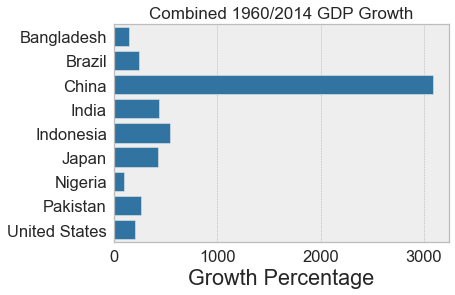

In [40]:
plt.clf()

fig = plt.figure()
sns.barplot (x = 'Pct_GDP_Growth', y = 'CountryName', color='tab:blue', data = gdp_growth_df)
plt.xlabel('Growth Percentage')
plt.ylabel('')
plt.title('Combined 1960/2014 GDP Growth', fontsize=17)
fig.savefig("./top_ten_images/combined_gdp_1960_2014.png", dpi=250, bbox_inches = "tight")

So, China had a 3,000% gain in GDP per capita. Created the second chart to see more detail in the other countries.

In [41]:
# let's view the bar chart without China
without_china = gdp_growth_df[gdp_growth_df['CountryName']!= 'China']

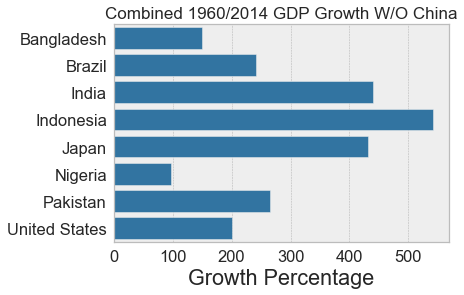

In [42]:
fig = plt.figure()
sns.barplot (x = 'Pct_GDP_Growth', y = 'CountryName', color='tab:blue', data = without_china)
plt.xlabel('Growth Percentage')
plt.ylabel('')
plt.title('Combined 1960/2014 GDP Growth W/O China', fontsize=17)
fig.savefig("./top_ten_images/combined_gdp_1960_2014_bbiijnpu.png", dpi=250, bbox_inches = "tight")

Indonesia comes in second at over 500%. India and Japan are third and fourth at over 400%. The United States is at roughly 200%. 


In [43]:
# combining gdp_growth_df and pop_growth_df and keeping country name, Pct_GDP_Growth, Pct_Pop_Growth

pct_pop_gdp = pd.merge(gdp_growth_df, pop_growth_df,on='CountryName', how='left')
pct_change = pct_pop_gdp[['CountryName','Pct_GDP_Growth', 'Pct_Pop_Growth']]
pct_change

,CountryName,Pct_GDP_Growth,Pct_Pop_Growth
0,Bangladesh,149.350784,230.031527
1,Brazil,241.699235,184.270530
2,China,3087.446171,104.516767
3,India,440.484093,188.059010
4,Indonesia,541.536538,189.836539
5,Japan,431.048263,37.438934
6,Nigeria,96.361001,292.545123
7,Pakistan,265.810331,312.016986
8,United States,199.723070,76.484912


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text yticklabel objects>)

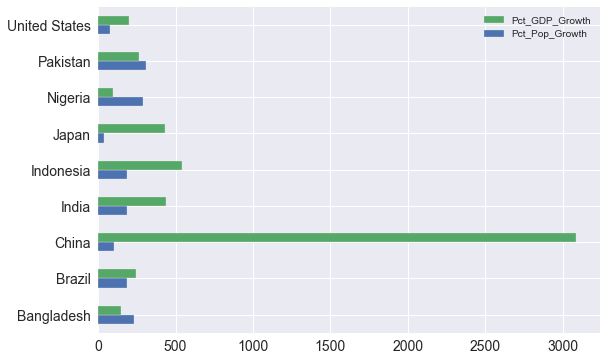

In [44]:
plt.style.use('seaborn')
pct_change.plot(x='CountryName', y=['Pct_Pop_Growth', 'Pct_GDP_Growth'], kind='barh', figsize=(9,6), legend='reverse')
plt.ylabel('')
plt.xticks(size=14)
plt.yticks(size=14)

I removed China from the Chart below, to see more detail of the other countries. 
Russia was removed because their GDP data only goes back to 1990. 


In [45]:
# drop China becasue it skews the visual
drop_c_g_r = pct_change.drop([2])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text yticklabel objects>)

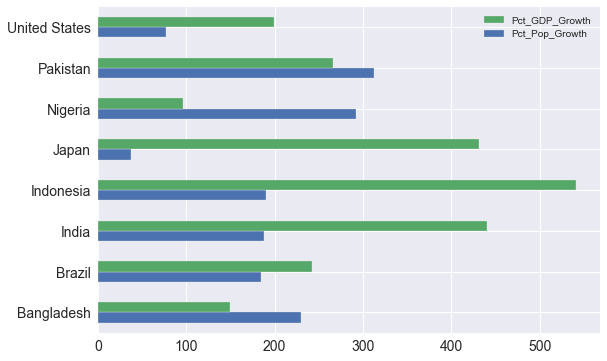

In [46]:
plt.style.use('seaborn')
drop_c_g_r.plot(x='CountryName', y=['Pct_Pop_Growth', 'Pct_GDP_Growth'], kind='barh', figsize=(9,6), legend='reverse')
plt.ylabel('')
plt.xticks(size=14)
plt.yticks(size=14)

Most countries have a far greater growth in GDP Per Capita than the growth in Population. Three countries have a higher Population Growth than their growth in GDP Per Capita - Pakistan, Nigeria and Bangladesh - the newcomers in the 2014 Top 10 population chart. Brazil had the tightest spread (difference between Population Growth and GDP Per Capita Growth). The United States, Indonesia and India shows more than a 2 to 1 growth in GDP Per Capita vs growth in Population. Japan has the smallest Population growth rate but a healthy growth rate in GDP Per Capita.


Questions for the long term:
- Will China's growth in GDP Per Capita enjoy similar gains?
- Will Japan's growth in GDP Per Capita keep growing with the smallest population gains?
- Do the newcomers in 2014 (Pakistan, Nigeria and Bangladesh) slow their population growths and focus on GDP Per Capita